# Country_wide_COVID 19_Datasets 

### Content
#### The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

#### Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent

### Inspiration
#### It's possible to use this dataset for various purposes and analyses
#### My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#import dataset
df1=pd.read_csv('population_structure_by_age_per_contry.csv')

In [3]:
df2=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')

In [4]:
#check the data
df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [5]:
df2.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
#merge based on country 
df = df1.merge(df2, on="Country", how = 'inner')

In [7]:
df.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,USA,0.189,0.657,0.154,2020-04-18,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,USA,0.189,0.657,0.154,2020-04-19,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0
2,USA,0.189,0.657,0.154,2020-04-20,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0
3,USA,0.189,0.657,0.154,2020-04-21,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0
4,USA,0.189,0.657,0.154,2020-04-22,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0


In [8]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
Country                     6603 non-null object
Fraction age 0-14 years     5456 non-null float64
Fraction age 15-64 years    5456 non-null float64
Fraction age 65+ years      5456 non-null float64
Date                        6603 non-null object
Population                  6603 non-null int64
Total Tests                 5505 non-null float64
Total Cases                 6554 non-null float64
Total Deaths                5367 non-null float64
Total Recovered             6318 non-null float64
Serious or Critical         4117 non-null float64
Active Cases                6544 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


In [9]:
#lets analyze the missing values 
df.isnull().sum()

Country                        0
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
Date                           0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
dtype: int64

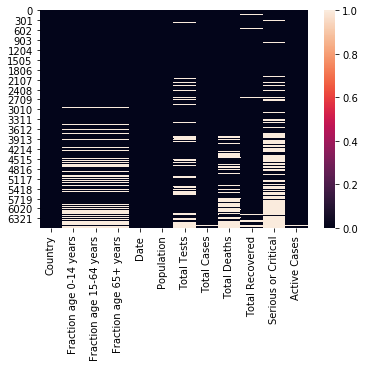

In [10]:
sns.heatmap(df.isnull())

In [11]:
#lets analyze each column 
df['Fraction age 0-14 years'].value_counts()

0.274    155
0.164     93
0.154     93
0.165     93
0.250     62
0.148     62
0.147     62
0.448     62
0.427     62
0.211     62
0.284     62
0.316     62
0.399     62
0.477     62
0.141     62
0.150     62
0.372     62
0.181     62
0.418     62
0.423     62
0.177     62
0.359     62
0.142     62
0.135     62
0.189     62
0.432     62
0.279     62
0.139     62
0.290     62
0.314     62
        ... 
0.266     31
0.396     31
0.198     31
0.424     31
0.153     31
0.155     31
0.353     31
0.136     31
0.160     31
0.131     31
0.201     31
0.348     31
0.329     31
0.401     31
0.176     31
0.184     31
0.191     31
0.249     31
0.252     31
0.317     31
0.416     31
0.285     31
0.281     31
0.313     31
0.464     31
0.115     31
0.267     31
0.168     31
0.205     31
0.171     31
Name: Fraction age 0-14 years, Length: 136, dtype: int64

In [12]:
df['Fraction age 0-14 years']=df['Fraction age 0-14 years'].fillna(df['Fraction age 0-14 years'].mean())

In [13]:
df['Fraction age 15-64 years'].value_counts()

0.6550    155
0.6920    124
0.6470    124
0.6620    124
0.6490     93
0.5410     93
0.6890     93
0.6370     93
0.6600     93
0.6570     93
0.5460     93
0.6430     93
0.5560     62
0.6930     62
0.6220     62
0.6030     62
0.6800     62
0.6580     62
0.6540     62
0.6670     62
0.6690     62
0.6840     62
0.5690     62
0.6560     62
0.6420     62
0.7070     62
0.6590     62
0.6010     62
0.6980     62
0.6860     62
         ... 
0.6660     31
0.7090     31
0.5600     31
0.7210     31
0.7060     31
0.5680     31
0.7240     31
0.6880     31
0.6390     31
0.5300     31
0.5960     31
0.7302     31
0.6640     31
0.6530     31
0.6960     31
0.5550     31
0.6760     31
0.8500     31
0.4980     31
0.5210     31
0.5040     31
0.6140     31
0.7170     31
0.7660     31
0.5010     31
0.7260     31
0.6330     31
0.6610     31
0.5910     31
0.6250     31
Name: Fraction age 15-64 years, Length: 118, dtype: int64

In [14]:
df['Fraction age 15-64 years']=df['Fraction age 15-64 years'].fillna(df['Fraction age 15-64 years'].mean())

In [15]:
df['Fraction age 65+ years'].value_counts()

0.0300    217
0.0320    155
0.0450    155
0.0250    124
0.0240    124
0.0310    124
0.0280    124
0.0340     93
0.0360     93
0.0290     93
0.0530     93
0.0350     93
0.0690     93
0.1970     93
0.0260     93
0.0390     62
0.1390     62
0.1480     62
0.0620     62
0.0480     62
0.0400     62
0.0720     62
0.0440     62
0.1090     62
0.0380     62
0.0230     62
0.1860     62
0.0860     62
0.0270     62
0.0540     62
         ... 
0.1340     31
0.0660     31
0.1430     31
0.0430     31
0.1010     31
0.1490     31
0.1000     31
0.0630     31
0.1840     31
0.1700     31
0.1530     31
0.1290     31
0.2300     31
0.0580     31
0.0670     31
0.1386     31
0.1980     31
0.0820     31
0.1660     31
0.1550     31
0.0900     31
0.0680     31
0.0800     31
0.1320     31
0.1740     31
0.0420     31
0.0850     31
0.1650     31
0.1500     31
0.0370     31
Name: Fraction age 65+ years, Length: 109, dtype: int64

In [16]:
df['Fraction age 65+ years']=df['Fraction age 65+ years'].fillna(df['Fraction age 65+ years'].mean())

In [17]:
df.isnull().sum()

Country                        0
Fraction age 0-14 years        0
Fraction age 15-64 years       0
Fraction age 65+ years         0
Date                           0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
dtype: int64

In [18]:
df['Total Tests'].value_counts()

1500.0        36
900.0         33
854.0         31
36.0          31
6500.0        30
7200.0        30
404.0         28
1673.0        28
284.0         27
120.0         25
714.0         25
110.0         24
5342.0        24
90000.0       21
1043.0        21
791.0         21
175.0         19
2172.0        18
20447.0       17
83.0          16
19.0          16
2402.0        15
322.0         15
329.0         15
1406.0        15
724.0         15
3498.0        15
3000.0        14
1247.0        14
27000.0       14
              ..
36523.0        1
707.0          1
334274.0       1
42425.0        1
1502.0         1
7015.0         1
553855.0       1
119859.0       1
169195.0       1
69182.0        1
161004.0       1
124920.0       1
32561.0        1
35992.0        1
30879.0        1
72315.0        1
4565.0         1
58685.0        1
586699.0       1
21157.0        1
16738.0        1
83577.0        1
342498.0       1
2307.0         1
2445063.0      1
214256.0       1
11090900.0     1
1075048.0     

In [19]:
df['Total Tests']=df['Total Tests'].fillna(0)

In [20]:
df['Total Cases'].value_counts()

11.0        139
18.0        114
16.0        105
6.0          95
15.0         65
8.0          51
1.0          50
10.0         49
39.0         49
12.0         47
24.0         46
7.0          45
45.0         39
122.0        37
3.0          36
82.0         36
25.0         36
19.0         34
187.0        31
13.0         30
17.0         29
23.0         28
116.0        28
76.0         27
38.0         26
5.0          26
332.0        24
101.0        22
14.0         22
81.0         22
           ... 
848717.0      1
1725.0        1
1699.0        1
1921.0        1
6428.0        1
2921.0        1
7572.0        1
2765.0        1
2017.0        1
1025.0        1
40770.0       1
2105.0        1
2070.0        1
4997.0        1
5638.0        1
59196.0       1
10694.0       1
264663.0      1
149435.0      1
5742.0        1
2002.0        1
5369.0        1
5994.0        1
647.0         1
72059.0       1
767.0         1
625.0         1
1839.0        1
2030.0        1
22016.0       1
Name: Total Cases, Lengt

In [21]:
df['Total Cases']=df['Total Cases'].fillna(0)

In [22]:
df['Total Deaths'].value_counts()

1.0        490
3.0        255
2.0        213
10.0       182
4.0        157
7.0        150
9.0        149
8.0        138
6.0        136
5.0         93
12.0        87
11.0        86
14.0        78
21.0        58
15.0        53
41.0        48
20.0        47
18.0        43
13.0        43
17.0        42
16.0        40
0.0         38
25.0        36
26.0        34
24.0        33
19.0        33
31.0        32
40.0        32
22.0        24
45.0        24
          ... 
72271.0      1
765.0        1
1028.0       1
1879.0       1
771.0        1
5288.0       1
2294.0       1
559.0        1
5031.0       1
6541.0       1
3689.0       1
1509.0       1
31368.0      1
459.0        1
526.0        1
259.0        1
2017.0       1
762.0        1
479.0        1
1937.0       1
599.0        1
2259.0       1
3679.0       1
30615.0      1
19718.0      1
23190.0      1
2669.0       1
633.0        1
719.0        1
6028.0       1
Name: Total Deaths, Length: 1185, dtype: int64

In [23]:
df['Total Deaths']=df['Total Deaths'].fillna(0)

In [24]:
df['Total Recovered'].value_counts()

6.0         140
8.0         111
7.0         105
2.0          98
13.0         96
10.0         91
11.0         86
5.0          81
3.0          80
9.0          79
4.0          72
14.0         71
1.0          63
16.0         53
17.0         52
12.0         50
15.0         50
55.0         48
19.0         42
18.0         35
27.0         35
32.0         34
24.0         33
39.0         29
44.0         25
21.0         25
26.0         24
83.0         24
30.0         24
29.0         23
           ... 
5496.0        1
4804.0        1
1262.0        1
89428.0       1
675.0         1
3451.0        1
8805.0        1
78171.0       1
14026.0       1
8168.0        1
2370.0        1
1779.0        1
1430.0        1
789.0         1
1102.0        1
1570.0        1
82514.0       1
9059.0        1
71252.0       1
23400.0       1
9340.0        1
78424.0       1
7628.0        1
3586.0        1
3054.0        1
80475.0       1
2655.0        1
104030.0      1
6327.0        1
5568.0        1
Name: Total Recovered, L

In [25]:
df['Total Recovered']=df['Total Recovered'].fillna(0)

In [26]:
df['Serious or Critical'].value_counts()

1.0        619
4.0        284
2.0        278
3.0        196
5.0        147
7.0        139
10.0       114
6.0         93
8.0         91
17.0        66
22.0        53
61.0        42
9.0         41
13.0        40
15.0        38
21.0        38
55.0        37
31.0        36
72.0        35
160.0       32
1559.0      31
92.0        31
18.0        30
11.0        29
378.0       29
8318.0      28
36.0        27
14.0        26
2300.0      26
111.0       26
          ... 
230.0        1
2713.0       1
1865.0       1
545.0        1
16484.0      1
227.0        1
944.0        1
215.0        1
435.0        1
464.0        1
432.0        1
306.0        1
188.0        1
248.0        1
90.0         1
116.0        1
94.0         1
16514.0      1
1465.0       1
15298.0      1
5218.0       1
914.0        1
806.0        1
807.0        1
1949.0       1
4387.0       1
1814.0       1
1479.0       1
554.0        1
1884.0       1
Name: Serious or Critical, Length: 529, dtype: int64

In [27]:
df['Serious or Critical']=df['Serious or Critical'].fillna(0)

In [28]:
df['Active Cases'].value_counts()

0.0        244
1.0        185
2.0        125
6.0        111
3.0        110
8.0         98
4.0         82
7.0         81
10.0        76
5.0         72
9.0         51
26.0        48
25.0        37
11.0        36
13.0        32
17.0        30
28.0        30
15.0        27
27.0        26
22.0        26
29.0        26
33.0        25
12.0        24
36.0        23
21.0        23
14.0        23
23.0        22
16.0        22
47.0        22
37.0        22
          ... 
7933.0       1
3282.0       1
7260.0       1
910.0        1
23989.0      1
44455.0      1
5750.0       1
1092.0       1
11123.0      1
1044.0       1
5986.0       1
9654.0       1
38132.0      1
2986.0       1
3225.0       1
1073.0       1
1718.0       1
1331.0       1
11425.0      1
7487.0       1
8595.0       1
25211.0      1
2723.0       1
12926.0      1
37082.0      1
5663.0       1
7992.0       1
4428.0       1
1274.0       1
1290.0       1
Name: Active Cases, Length: 2680, dtype: int64

In [29]:
df['Active Cases']=df['Active Cases'].fillna(0)

In [30]:
#check the null value again
df.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
Date                        0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
dtype: int64

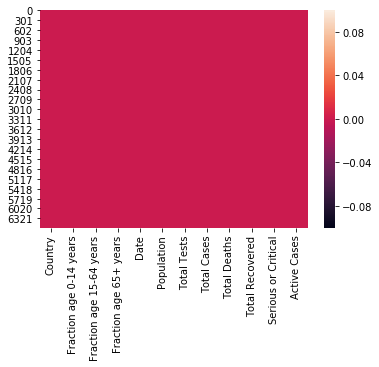

In [31]:
sns.heatmap(df.isnull())

In [32]:
#check datatypes
df.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
Date                         object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
dtype: object

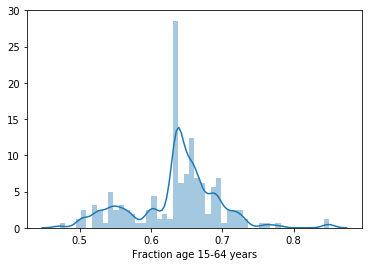

In [33]:
sns.distplot(df['Fraction age 15-64 years'])

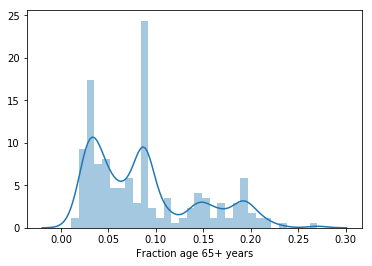

In [34]:

sns.distplot(df['Fraction age 65+ years'])

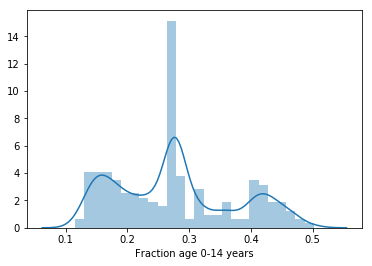

In [35]:
sns.distplot(df['Fraction age 0-14 years'])

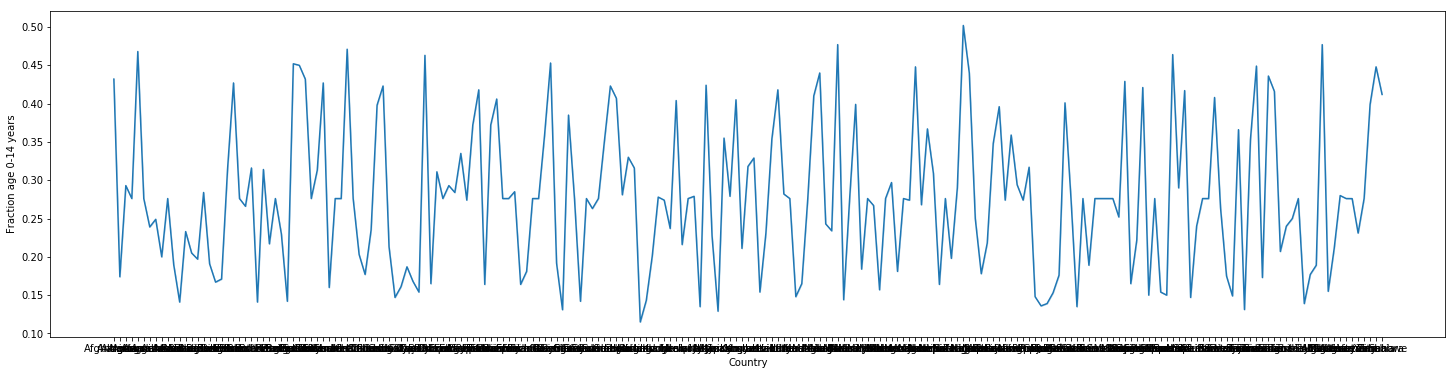

In [36]:
#lets visualize the data
plt.figure(figsize=(25,6))
sns.lineplot(x='Country',y='Fraction age 0-14 years',data=df)

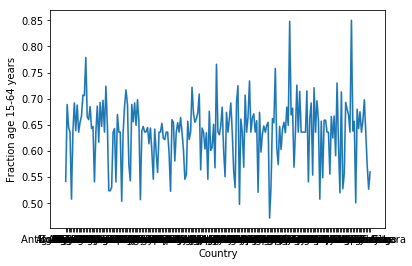

In [37]:
#lets visualize the data
sns.lineplot(x='Country',y='Fraction age 15-64 years',data=df)

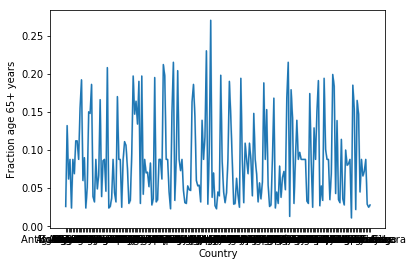

In [38]:
#lets visualize the data
sns.lineplot(x='Country',y='Fraction age 65+ years',data=df)

In [39]:
df['Date']=pd.to_datetime(df['Date'])

In [40]:
#lets see year
df['year'] = pd.DatetimeIndex(df['Date']).year

In [41]:
#lets see monthwise
df['month'] = pd.DatetimeIndex(df['Date']).month

In [42]:
df.head(2)

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,year,month
0,USA,0.189,0.657,0.154,2020-04-18,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,2020,4
1,USA,0.189,0.657,0.154,2020-04-19,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,2020,4


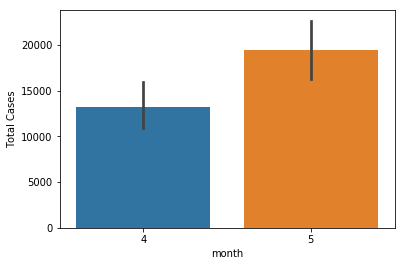

In [43]:
sns.barplot(x='month',y='Total Cases',data=df)

in may number of cases are more as compare to april month

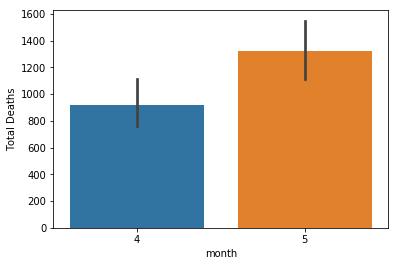

In [44]:
sns.barplot(x='month',y='Total Deaths',data=df)

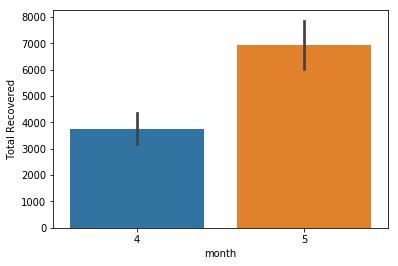

In [45]:
sns.barplot(x='month',y='Total Recovered',data=df)

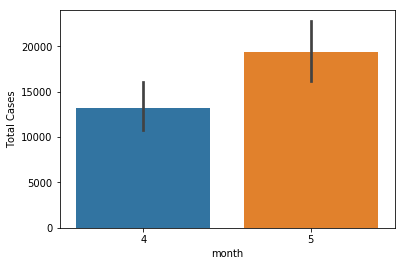

In [46]:
sns.barplot(x='month',y='Total Cases',data=df)

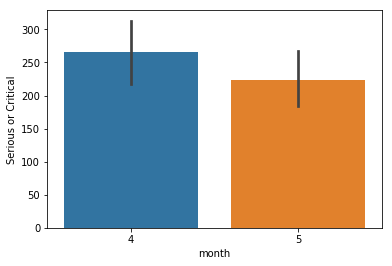

In [47]:
sns.barplot(x='month',y='Serious or Critical',data=df)



##### number of cases .number of deaths ,number of recovery cases have been increased in the month of may as compare to april month but if you see the serious and critical cases are less in the month of may 

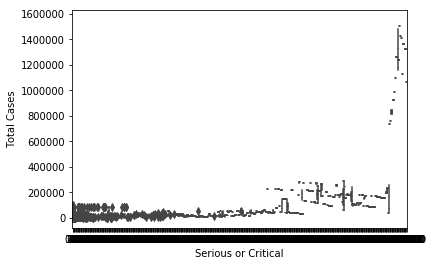

In [48]:
sns.boxplot(x="Serious or Critical",y='Total Cases', data=df)

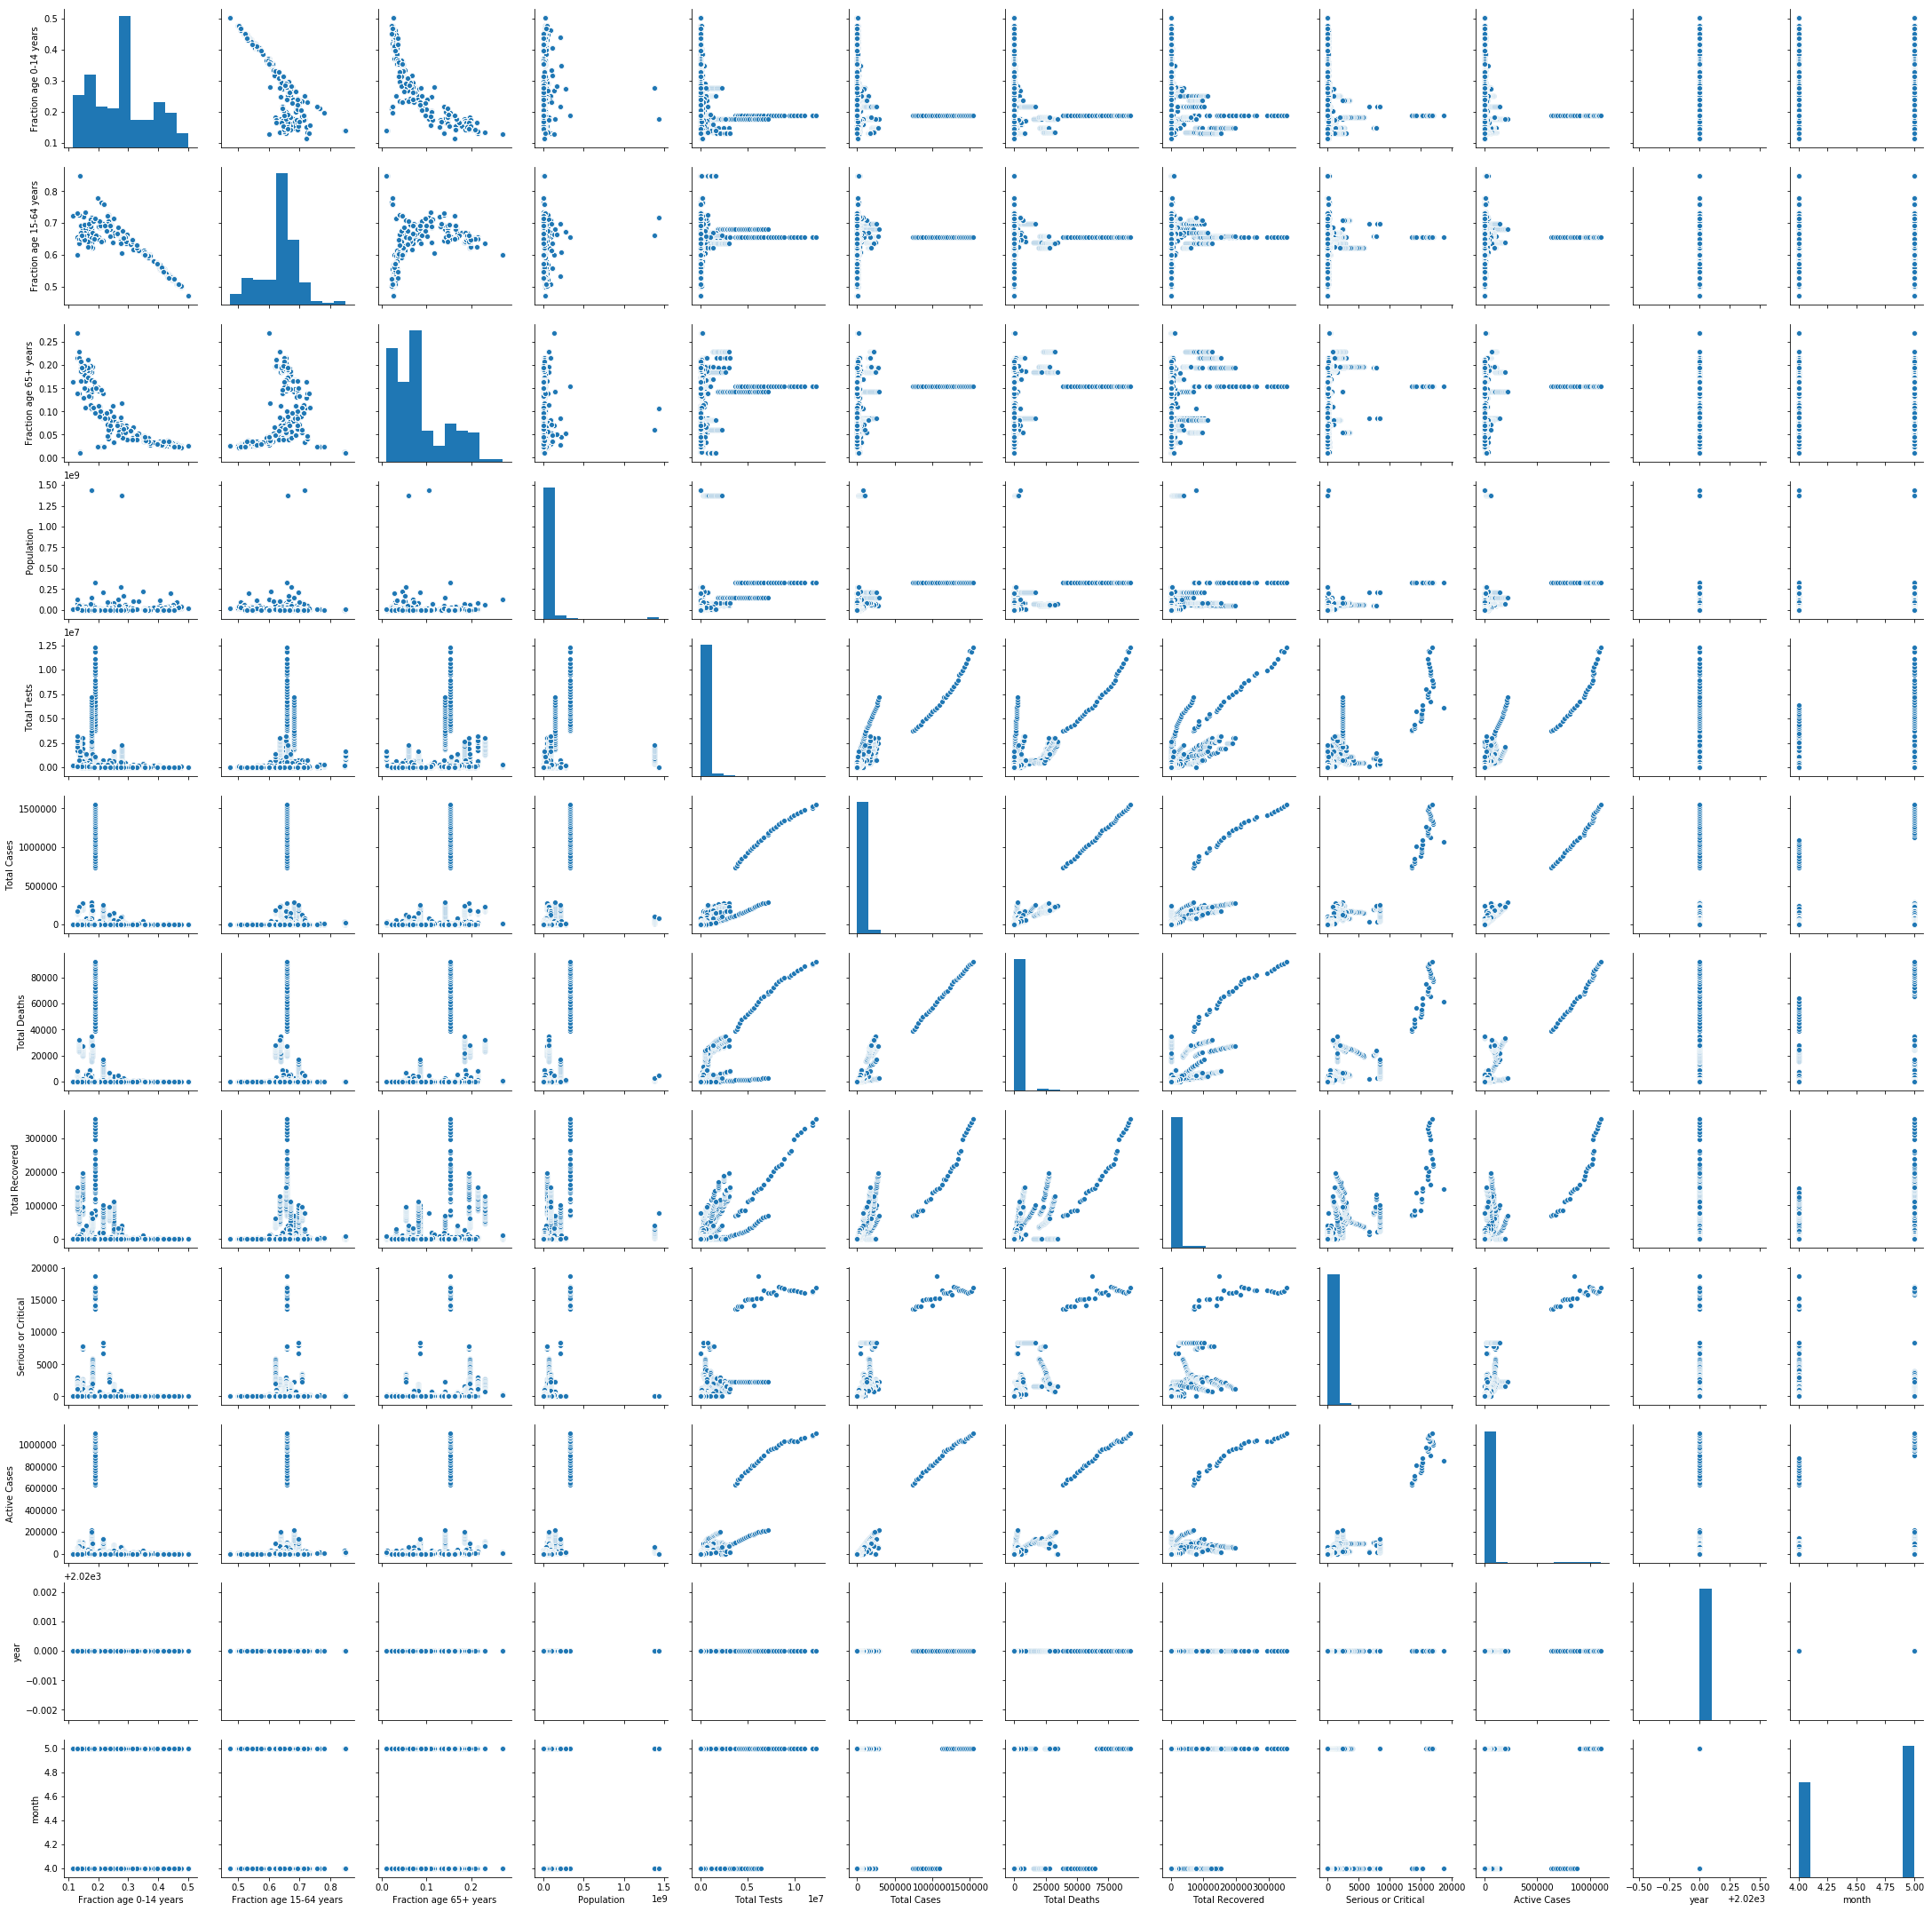

In [49]:
sns.pairplot(df)

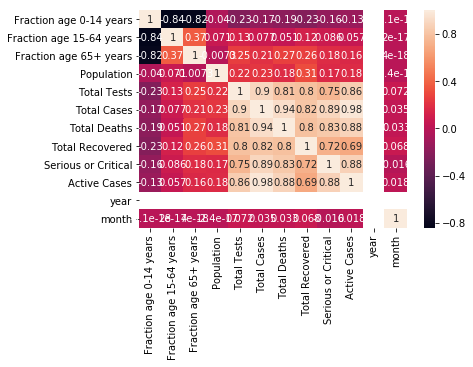

In [53]:
sns.heatmap(df.corr(),annot=True)

## number of cases .number of deaths ,number of recovery cases have been increased in the month of may as compare to april month but if you see the serious and critical cases are less in the month of may¶